In [1]:
import numpy as np
import pandas as pd
import mplfinance as mpl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Vansh\HDFC Support Resistance.csv",index_col=0,parse_dates=True)
# df=df.drop(['Symbol'],axis=1)
# df=df.drop(['Series'],axis=1)
# df=df.drop(['Prev Close'],axis=1)
# df=df.drop(['Last'],axis=1)
# df=df.drop(['VWAP'],axis=1)
# df=df.drop(['Turnover'],axis=1)
# df=df.drop(['Trades'],axis=1)
# df=df.drop(['Deliverable Volume'],axis=1)
# df=df.drop(['%Deliverble'],axis=1)
df

,open,high,low,close
time,,,,
2022-03-01 09:25:00,2364.00,2386.85,2363.70,2379.75
2022-03-01 09:40:00,2379.85,2381.95,2377.10,2377.85
2022-03-01 09:55:00,2377.85,2385.00,2375.10,2383.95
2022-03-01 10:10:00,2384.30,2388.75,2380.40,2387.65
2022-03-01 10:25:00,2387.65,2389.00,2383.50,2386.90
...,...,...,...,...
2023-11-30 14:25:00,2382.50,2383.15,2379.00,2382.40
2023-11-30 14:40:00,2382.35,2383.25,2379.20,2381.00
2023-11-30 14:55:00,2380.95,2382.65,2380.40,2382.20


In [3]:
# df=df.set_index(pd.DatetimeIndex(df['time'].values))
# df

In [4]:
supports=df[df.low==df.low.rolling(5,center=True).min()].low
supports

time
2022-03-01 11:25:00    2383.20
2022-03-01 13:40:00    2395.00
2022-03-01 14:40:00    2395.60
2022-04-01 10:55:00    2422.70
2022-04-01 13:55:00    2426.30
                        ...   
2023-11-29 12:40:00    2405.60
2023-11-29 13:25:00    2406.00
2023-11-30 10:10:00    2380.10
2023-11-30 11:40:00    2382.75
2023-11-30 14:25:00    2379.00
Name: low, Length: 1717, dtype: float64

In [5]:
resistance=df[df.high==df.high.rolling(5,center=True).max()].high
resistance

time
2022-03-01 10:55:00    2392.00
2022-03-01 11:10:00    2392.00
2022-03-01 12:40:00    2400.00
2022-03-01 13:25:00    2402.00
2022-03-01 13:55:00    2402.00
                        ...   
2023-11-29 10:40:00    2409.40
2023-11-29 12:25:00    2409.85
2023-11-29 14:10:00    2411.95
2023-11-30 10:55:00    2391.70
2023-11-30 12:55:00    2386.40
Name: high, Length: 1675, dtype: float64

In [21]:
levels=pd.concat([supports,resistance])
levels=levels[abs(levels.diff())>100]

In [22]:
levels

time
2022-02-24 10:25:00    2277.00
2022-09-03 11:25:00    2296.10
2022-01-07 10:25:00    2370.10
2022-11-28 09:25:00    2502.00
2022-11-28 12:25:00    2690.40
2023-07-20 09:40:00    2580.00
2022-04-19 11:55:00    2653.70
2022-01-07 10:55:00    2471.00
2023-10-07 10:40:00    2756.00
2023-07-20 10:25:00    2630.95
dtype: float64

In [23]:
# plt.figure(figsize=(16,8))
# plt.title("Close Price History",fontsize=18)
# plt.plot(df['close'])
# plt.xlabel('time',fontsize=18)
# plt.ylabel('Close Price')
# plt.show()

C:\Users\Vansh\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




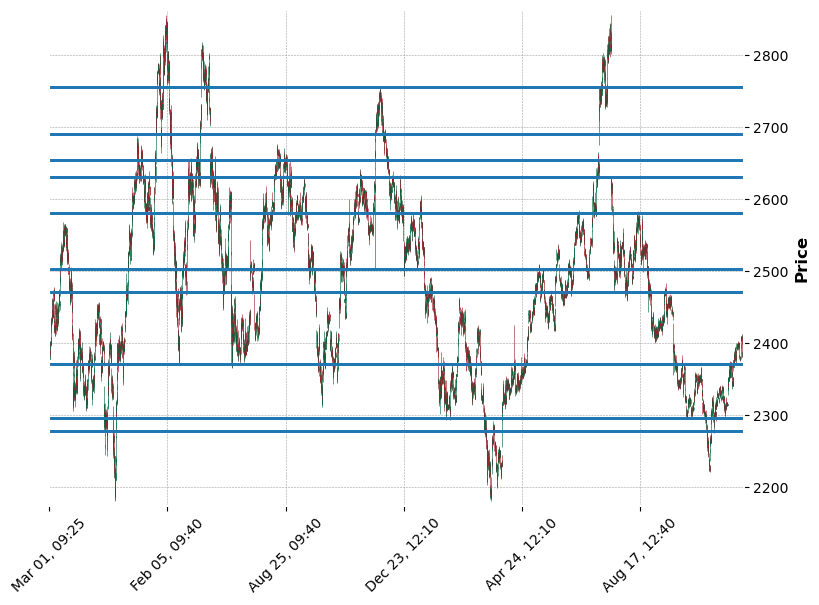

In [26]:
mpl.plot(df,type='candle',tight_layout=True,hlines=levels.to_list(),style='charles')